# LFV Higgs decays in SeeSaw model ( Thao et al results) First numeric results no compatibles con seesaw new discussions.

## In this notebook we use the mpmath implementations of PaVe functions

In [1]:
from sympy import init_printing, Symbol,lambdify, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles,DiagramsOneFermionW, DiagramsOneFermionG
from seesaw_FF import g, mW, Uν, Uνc, mn, m, C, Cc, a,b,i,j,h
from seesaw_FF import j as jj

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [84]:
mp.dps = 30; mp.pretty = True

In [6]:
import numpy as np

In [7]:
import subprocess as s

In [8]:
from multiprocessing import Pool
from time import time

In [9]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

### Form factor with one fermion in the loop.

#### AL one fermion 

In [12]:
from OneLoopLFVHD.data import ml

In [13]:
mh,ma,mb = symbols('m_h,m_a,m_b',real=True)
valores ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}

cambios_hab = lambda a,b:{lfvhd.ma:valores[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}


Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

from Unu_seesaw import Upmns_mp
from Unu_seesaw import Unump as Unu # no mixing
from Unu_seesaw import Cijmp as Cij # no mixing

In [14]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [15]:
Diagramas = TrianglesTwoFermion + TrianglesOneFermion + Bubbles

In [16]:
from sympy import Add
def GIM_One(exp):
    args = exp.expand().args
    func = exp.expand().func
    if isinstance(func,Add):
        print('func = Add')
        X = Add(*[t for t in args if t.has(mn[i])]).simplify()
    else:
        print('func no es Add')
        X = exp
    return X#mni**2*X1[mni**2]

In [17]:
def sumOne(m6,Aab,aa,bb): 
    mnk = [m1,m2,m3,m6/3,m6/2,m6]
    AL = []
    for k in range(1,7):
        A = Aab(mnk[k-1],Unu(m1,m6,bb,k),conj(Unu(m1,m6,aa,k)))
        #print('Ai = ',A)
        AL.append(A)
    return mp.fsum(AL)


****************************************************************************************************


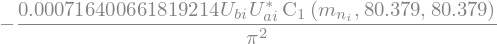

****************************************************************************************************


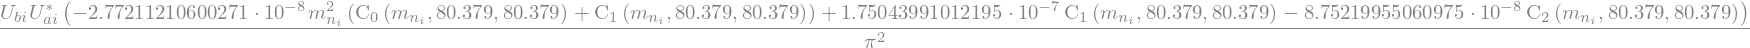

****************************************************************************************************


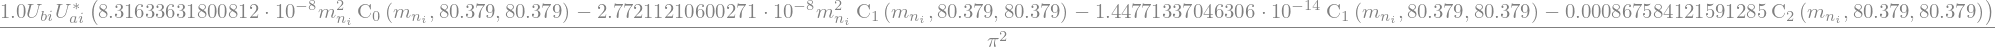

****************************************************************************************************


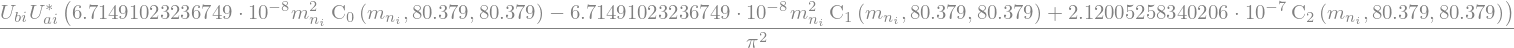

****************************************************************************************************


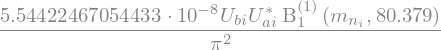

****************************************************************************************************


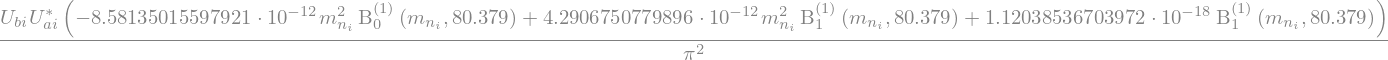

****************************************************************************************************


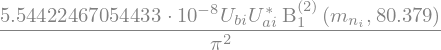

****************************************************************************************************


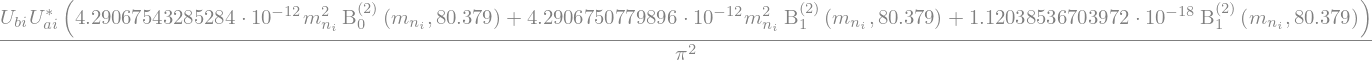

In [40]:
y23 = 0.0
y13 = 0.0
for T in TrianglesOneFermion + Bubbles:
    x23 = T.AL().subs(lfvhd.D,4).subs(lfvhd.B12_0(mW,mW),0).subs(
        cambios_hab(2,3)).subs(valores).subs(UnuOne).simplify()
    x13 = T.AL().subs(lfvhd.D,4).subs(lfvhd.B12_0(mW,mW),0).subs(
        cambios_hab(1,3)).subs(valores).subs(UnuOne).simplify()
    print('*'*100)
    #display((x13/x23).simplify())
    display(x13)
    
    y23 += x23
    y13 += x13

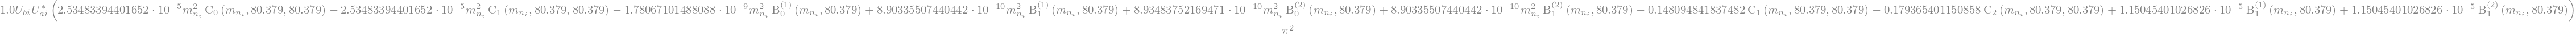

In [42]:
y23.simplify()

In [19]:
from sympy import Add

In [20]:
args = TrianglesOneFermion[2].AL().subs(lfvhd.D,4).subs(cambios_hab(2,3)).subs(valores).subs(UnuOne).expand().args
#args
[t for t in args if t.has(mn[i])]#).simplify()

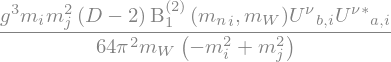

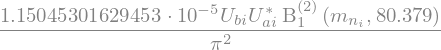

In [80]:
display(Bubbles[2].AL())
fs23 = Bubbles[2].AL().subs(lfvhd.D,4).subs(cambios_hab(2,3)).subs(valores).subs(UnuOne)
fs23

In [56]:
fmp23 = lambdify([mni,Ubi,Ucai],replaceBs(fs23),
                         modules=[pave_functions(valores[mh],2,3,lib='mpmath'),'mpmath'])

In [57]:
fmp23(1,2,3)

(-3.0836515569243e-5 + 0.0j)

In [60]:
def sumOne(m6,Aab,a,b): 
    mnk = [m1,m2,m3,m6/3.0,m6/2.0,m6]
    AL = []
    for k in range(1,7):
        UU = Unu(m1,m6,b,k)*conj(Unu(m1,m6,a,k))
        A = Aab(mnk[k-1],Unu(m1,m6,b,k),conj(Unu(m1,m6,a,k)))
        print('*'*100)
        print(f'Afi = {A/UU}, Ubi Ucai = {UU}')
        print(f'Ai = {A}')
        AL.append(A)
    return mp.fsum(AL)

In [85]:
sumOne(mpf('1e10'),fmp23,2,3)

****************************************************************************************************
Afi = (-0.00000513939308880177974057538130389 + 0.0j), Ubi Ucai = (-0.185073786658893895157832693012 + 0.0j)
Ai = (0.000000951166940073094311154233424155 + 0.0j)
****************************************************************************************************
Afi = (-0.00000513939308880177974057538130582 + 0.0j), Ubi Ucai = (-0.331189606291921319674041124399 + 0.0j)
Ai = (0.0000017021135736596828571866047157 + 0.0j)
****************************************************************************************************
Afi = (-0.00000513939308880177974057538136992 + 0.0j), Ubi Ucai = (0.485495249283607205776881879571 + 0.0j)
Ai = (-0.00000249515092881426808009789109539 + 0.0j)
****************************************************************************************************
Afi = (-0.0000240110679852998625610416169023 + 0.0j), Ubi Ucai = (-5.55221359976681685473682451312e-23 + 0.0j)
Ai

(0.000000158129584918509088240717130519 + 0.0j)

In [64]:
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import B2_1
from OneLoopLFVHD.LFVHDFeynG_mpmath import B2_1 as B2_1_2

In [79]:
B2_1_2(valores[mh],ml[2],mpf('1e9'),valores[mW])

-3235510714323.2

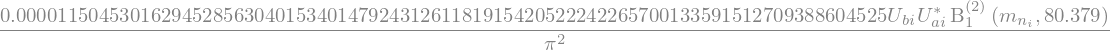

In [28]:
fs23

In [37]:
m6 = mpf('1e-1') 
out = 0.0
mnk = [m1,m2,m3,m6/3.0,m6/2.0,m6]
for k in range(1,7):
    xx = fs23.subs({Ubi:Unu(m1,m6,3,k),Ucai:conj(Unu(m1,m6,2,k))}
         ).subs(lfvhd.B2_1(mni,valores[mW]),B2_1_2(valores[mh],ml[3],mnk[k-1],valores[mW])).n()
    out += xx
    print(xx)
print(f'out = {out}')

9.51166940041509e-7
1.70211357336319e-6
-2.49515092756009e-6
2.85350083636604e-17
2.94618114030056e-16
-1.25354958698149e-15
out = 1.58129584914206E-7


In [47]:
fy23 =  lambdify([mni,Ubi,Ucai],replaceBs(y23),
                         modules=[pave_functions(valores[mh],2,3,lib='mpmath'),'mpmath'])
fy13 =  lambdify([mni,Ubi,Ucai],replaceBs(y13),
                         modules=[pave_functions(valores[mh],2,3,lib='mpmath'),'mpmath'])

In [49]:
m6 = mpf('1e2') 
out = 0.0
mnk = [m1,m2,m3,m6/3.0,m6/2.0,m6]
for k in range(1,7):
    xx = fy23(mnk[k-1],Unu(m1,m6,3,k),conj(Unu(m1,m6,2,k)))
    out += xx
    print(xx)
print(f'out = {out}')

(7.82363123750787e-8 + 0.0j)
(1.40003908500487e-7 + 0.0j)
(-2.05233591775791e-7 + 0.0j)
(-2.32741855158893e-21 + 0.0j)
(-8.50844524167669e-20 + 0.0j)
(1.84147112261635e-18 + 0.0j)
out = (1.30066291015292e-8 + 0.0j)


In [50]:
out = 0.0
mnk = [m1,m2,m3,m6/3.0,m6/2.0,m6]
for k in range(1,7):
    xx = fy13(mnk[k-1],Unu(m1,m6,3,k),conj(Unu(m1,m6,2,k)))
    out += xx
    print(xx)
print(f'out = {out}')

(3.78375076748495e-10 + 0.0j)
(6.77102332865518e-10 + 0.0j)
(-9.92573316431901e-10 + 0.0j)
(-1.12559323009709e-23 + 0.0j)
(-4.11490341771515e-22 + 0.0j)
(8.90584356697468e-21 + 0.0j)
out = (6.29040931905949e-11 + 0.0j)


In [30]:
B2_1(ml[3],1e4,valores[mW])

(-9.9597493449867181333240354275095282342344708966009012559948831393257685403122665 + 0.0j)

In [31]:
print(1.0/(ml[3]**2 - ml[2]**2))
print(1.0/(ml[3]**2 - ml[1]**2))
print(1.0/(ml[2]**2 - ml[1]**2))

0.31785714202163265525742273475191738293781716484916630953933427206803562770687778
0.31673321880315614067148471418923272083521250150776357930116375516530752375892926
89.575439013129853104407198048702180344358065207382984075416667148171974461828431


In [32]:
print(ml[1]**2)
print(ml[2]**2)
print(ml[2]**2 - ml[1]**2)
print(1.0/(ml[2]**2 - ml[1]**2))

0.000000261121
0.0111640356
0.011163774479
89.575439013129853104407198048702180344358065207382984075416667148171974461828431


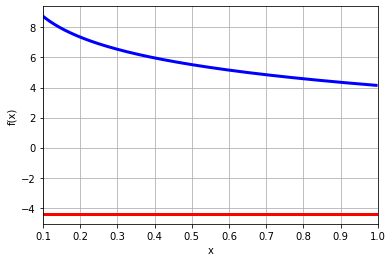

In [44]:
plot([lambda m: B2_1(ml[3],m,valores[mW]),
     lambda m: B2_1_2(mpf('125.1'),ml[3],m,valores[mW])],[0.1,1])

In [95]:
from Unu_seesaw import MD_mp

In [96]:
MD = lambda m6: MD_mp(m1,m2,m3,m6/3,m6/2,m6)

In [136]:
m6 = mpf('1e15')
MD(m6)[2,1]

(0.0 - 44.4627406514877449079702485217j)

In [137]:
def Mnu(m6): 
    M = MD(m6)
    return matrix([
    [0,0,0,M[0,0],M[0,1],M[0,2]],
    [0,0,0,M[1,0],M[1,1],M[1,2]],
    [0,0,0,M[2,0],M[2,1],M[2,2]],
    [M[0,0],M[1,0],M[2,0],m6/3.0,0.0,0.0],
    [M[0,1],M[1,1],M[2,1],0.0,m6/2.0,0.0],
    [M[0,2],M[1,2],M[2,2],0.0,0.0,m6]
])
M = Mnu(m6)
M

[                                     0.0                                       0.0                                       0.0  (0.0 + 14.9948557845682574352327370923j)  (0.0 + 36.2130145152043105316775578446j)  (0.0 + 33.5539200903545190513329818023j)]
[                                     0.0                                       0.0                                       0.0  (0.0 - 10.1398393932011755498405406086j)  (0.0 + 32.2323064356850175135972505894j)  (0.0 + 165.545664838284854283782543635j)]
[                                     0.0                                       0.0                                       0.0  (0.0 + 6.08404727406192131098081461834j)  (0.0 - 44.4627406514877449079702485217j)  (0.0 + 147.337008413169144244958134367j)]
[(0.0 + 14.9948557845682574352327370923j)  (0.0 - 10.1398393932011755498405406086j)  (0.0 + 6.08404727406192131098081461834j)           333333333333333.333333333333333                                       0.0                                

In [138]:
E, ER = eighe(Mnu(m6))

In [139]:
Mdia = ER*M*ER.transpose_conj()
Mdia[0,0]

(4.42316749398669316176344458469e-12 + 1.24077525354631309102428220978e-11j)

In [140]:
E

[-5.02442010790930107591430074532e-11]
[-8.65679589952604204245292340074e-12]
[-1.08680247142623434124304943571e-12]
[     333333333333333.333333333334427]
[     500000000000000.000000000008654]
[     1000000000000000.00000000005024]

In [141]:
mnk = [m1,m2,m3,m6/3.0,m6/2.0,m6]
AL = []
for k in range(1,7):
    UU = ER[3-1,k-1]*conj(ER[2-1,k-1])
    A = fmp23(mnk[k-1],ER[3-1,k-1],conj(ER[2-1,k-1]))
    print('*'*100)
    print(f'Afi = {A/UU}, Ubi Ucai = {UU}')
    print(f'Ai = {A}')
    AL.append(A)
print(mp.fsum(AL))

****************************************************************************************************
Afi = (-0.00000513939308880177974057538130389 + 0.0j), Ubi Ucai = (0.485564679218179088489374379079 + 0.0j)
Ai = (-0.00000249550775654016277386455091638 + 0.0j)
****************************************************************************************************
Afi = (-0.00000513939308880177974057538130582 + 0.0j), Ubi Ucai = (-0.334132884435122136595172157285 + 0.0j)
Ai = (0.00000171724023700727047065311572823 + 0.0j)
****************************************************************************************************
Afi = (-0.00000513939308880177974057538136992 + 0.0j), Ubi Ucai = (-0.151431794783056951894202239898 + 0.0j)
Ai = (0.000000778267519532892303211435291831 + 0.0j)
****************************************************************************************************
Afi = (-20915871157220.7904107692218733 + 0.0j), Ubi Ucai = (-5.55221359976681685473682445705e-28 + 0.0j)
Ai = (